In [1]:
!pip install -U ogb

In [2]:
# Make sure below prints the required package version for the dataset you are working on.
import ogb
print(ogb.__version__)

1.3.6


In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
from ogb.lsc import PCQM4Mv2Dataset

In [ ]:
dataset = PCQM4Mv2Dataset(root = 'Data' , only_smiles = True)

In [14]:
# get i-th molecule and its target value (nan for test data)
i = 1234
print(dataset) # ('O=C1C=CC(O1)C(c1ccccc1C)O', 5.292614392225) samples 3746620

PCQM4Mv2Dataset(3746620)


In [70]:
for i in range(1):
    print(dataset[i][1])

3.0476751256


In [19]:
import pandas as pd

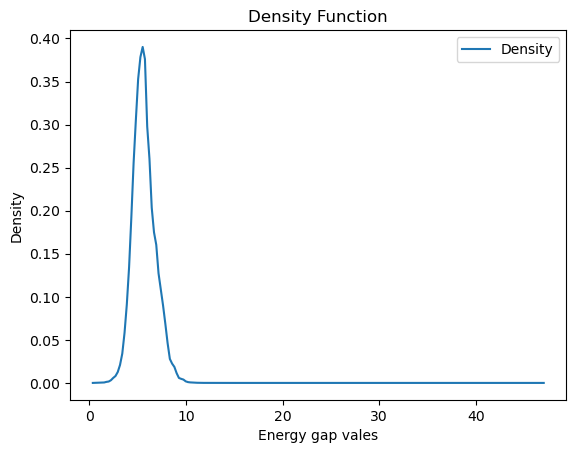

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Create y_values only with finite numerical data, ignoring strings, infs, and NaNs
y_values = [row[1] for row in dataset if isinstance(row[1], (int, float)) and np.isfinite(row[1])]

# Check if y_values is not empty to proceed with KDE
if len(y_values) > 0:
    # Generate KDE
    density = gaussian_kde(y_values)
    xs = np.linspace(min(y_values), max(y_values), 200)
    ys = density(xs)

    # Create the density plot
    plt.plot(xs, ys, label='Density')
    plt.xlabel('Energy gap vales')
    plt.ylabel('Density')
    plt.title('Density Function')
    plt.legend()
    plt.show()
else:
    print("No valid data for plotting.")
